In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset

## Loading X_i  and Temperature 

In [7]:
X = pd.read_csv('finalsmol.csv')

In [8]:
X.head(5)

,T,H2,O2,H2O,OH,HO2,H2O2,H,O,N2,...,w H2,w O2,w H2O,w OH,w HO2,w H2O2,w H,w O,w N2,w Ar
0,3651.907313,26.019801,60.437219,254.692651,60.217791,0.233046,2.474172e-02,12.811078,16.318481,354.463564,...,-0.000088,-4.414575e-06,0.000114,-0.000096,2.705426e-05,-3.106866e-05,0.000078,-0.000001,0.0,0.0
1,4894.965266,56.312144,0.578096,7.743824,11.479244,0.004017,2.180146e-04,113.878143,11.817845,195.941569,...,-0.000034,5.328767e-07,-0.000018,0.000070,-6.003952e-08,1.726643e-08,0.000035,-0.000052,0.0,0.0
2,4617.686928,18.110285,88.257319,43.030563,76.624376,0.333806,1.231833e-02,47.158080,102.992481,41.348501,...,0.000387,-1.879088e-05,-0.000135,-0.000085,-1.026486e-05,-1.058502e-06,-0.000405,0.000280,0.0,0.0
3,2264.496476,0.128963,0.033197,4.378581,0.048670,0.000006,7.631055e-07,0.009569,0.002380,0.020255,...,18.737682,7.919502e+00,-24.096603,7.386922,3.235493e-03,2.141220e-04,3.327256,0.863778,0.0,0.0
4,2936.051117,0.021012,0.019395,0.081576,0.023190,0.000003,7.205931e-08,0.019507,0.012721,3.847080,...,22.578367,7.018544e+00,-53.845981,13.550452,8.189336e-04,-1.004742e-04,48.984158,26.257004,0.0,0.0


In [9]:
X.shape

(2050000, 21)

In [5]:
col_names_my = {'H2': 'X1', 'O2': 'X2', 'H2O': 'X3', 'OH': 'X4', 'HO2': 'X5', 'H2O2': 'X6', 'H': 'X7',
                'O': 'X8', 'N2': 'X9', 'Ar': 'X10', 
                'w H2': 'w1', 'w O2': 'w2', 'w H2O': 'w3', 'w OH': 'w4',
                'w HO2': 'w5', 'w H2O2': 'w6', 'w H': 'w7', 'w O': 'w8','w N2': 'w9', 'w Ar': 'w10'}

In [6]:
X.rename(columns = col_names_my, inplace = True)

In [7]:
y = X.iloc[:, 11:].copy()
y.head(5)

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10
0,-0.000088,-4.414575e-06,0.000114,-0.000096,2.705426e-05,-3.106866e-05,0.000078,-0.000001,0.0,0.0
1,-0.000034,5.328767e-07,-0.000018,0.000070,-6.003952e-08,1.726643e-08,0.000035,-0.000052,0.0,0.0
2,0.000387,-1.879088e-05,-0.000135,-0.000085,-1.026486e-05,-1.058502e-06,-0.000405,0.000280,0.0,0.0
3,18.737682,7.919502e+00,-24.096603,7.386922,3.235493e-03,2.141220e-04,3.327256,0.863778,0.0,0.0
4,22.578367,7.018544e+00,-53.845981,13.550452,8.189336e-04,-1.004742e-04,48.984158,26.257004,0.0,0.0


In [8]:
X.drop(list(X.columns)[11:], axis = 1, inplace = True)
# X.drop(list(X.columns)[0], axis = 1, inplace = True)
X.head(5)

,T,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,3651.907313,26.019801,60.437219,254.692651,60.217791,0.233046,2.474172e-02,12.811078,16.318481,354.463564,0.485667
1,4894.965266,56.312144,0.578096,7.743824,11.479244,0.004017,2.180146e-04,113.878143,11.817845,195.941569,0.571799
2,4617.686928,18.110285,88.257319,43.030563,76.624376,0.333806,1.231833e-02,47.158080,102.992481,41.348501,0.011138
3,2264.496476,0.128963,0.033197,4.378581,0.048670,0.000006,7.631055e-07,0.009569,0.002380,0.020255,0.448616
4,2936.051117,0.021012,0.019395,0.081576,0.023190,0.000003,7.205931e-08,0.019507,0.012721,3.847080,0.001065


## Data distribution plots

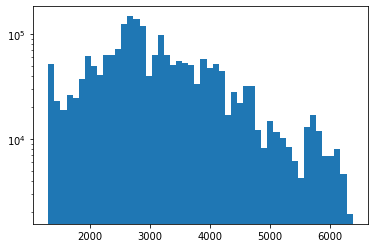

In [9]:
X_col = list(X.columns)
n, bins, patches = plt.hist(X[X_col.pop(0)], bins = 50, log=True)

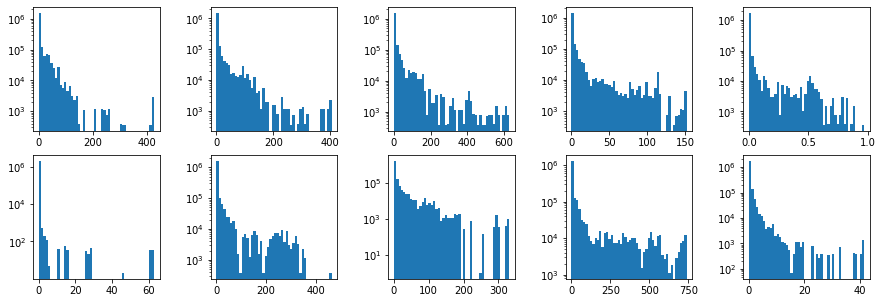

In [10]:
fig, axes = plt.subplots(2, 5)
fig.set_figheight(5)
fig.set_figwidth(15)
for i in range(2):
    for j in range(5):
        axes[i, j].hist(X[X_col.pop(0)], bins = 50, log=True)
plt.subplots_adjust(wspace=0.4, hspace=0.2)

## Loading w_i

In [11]:
# y = pd.read_csv('y_train.csv')

In [12]:
#y.tail(15)

## Checking for compliance with the conservation law 

In [13]:
res1 = []
res2 = []
A = np.array([2, 0, 2, 1, 1, 2, 1, 0, 0, 0]) 
B = np.array([0, 2, 1, 1, 2, 2, 0, 1, 0, 0])
for i in range(10000):
    w = np.array(y.iloc[i])
    res1.append(np.dot(A, w))
    res2.append(np.dot(A, w))

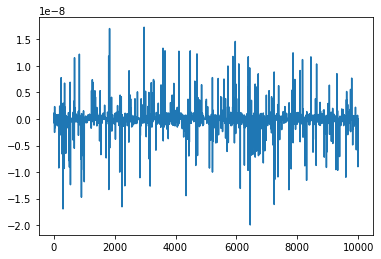

In [14]:
plt.plot(res1)

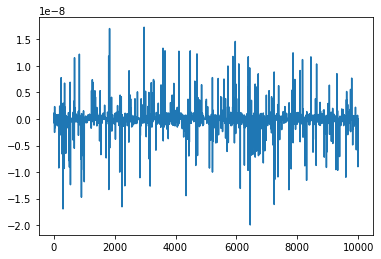

In [15]:
plt.plot(res2)

## Data distribution plots

In [16]:
col_drop = list(y.columns)

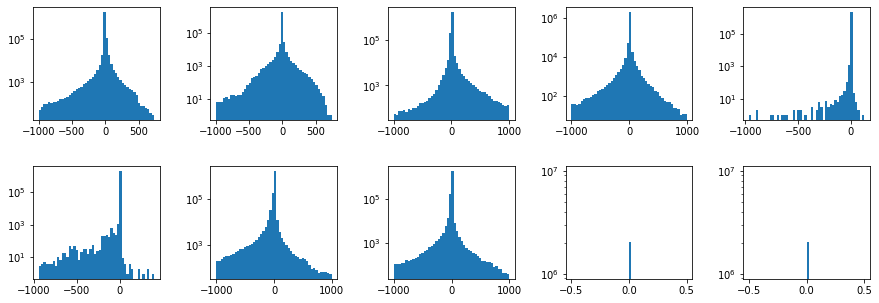

In [17]:
y_col = list(y.columns)
fig, axes = plt.subplots(2, 5)
fig.set_figheight(5)
fig.set_figwidth(15)
for i in range(2):
    for j in range(5):
        axes[i, j].hist(y[y_col.pop(0)], bins = 50, log=True)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [18]:
y.describe()

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10
count,2.050000e+06,2.050000e+06,2.050000e+06,2.050000e+06,2.050000e+06,2.050000e+06,2.050000e+06,2.050000e+06,2050000.0,2050000.0
mean,-2.662693e-01,-4.967058e-01,2.737485e+00,1.861955e-01,-3.040462e-02,-2.359120e-01,-4.626399e+00,-1.397636e+00,0.0,0.0
std,3.732465e+01,2.541317e+01,4.572807e+01,3.004695e+01,2.235526e+00,8.852719e+00,5.245679e+01,3.846296e+01,0.0,0.0
min,-9.997406e+02,-9.896512e+02,-9.997891e+02,-9.998430e+02,-9.649920e+02,-9.431292e+02,-9.998775e+02,-9.999944e+02,0.0,0.0
25%,-2.285885e-05,-2.203686e-06,-5.989531e-06,-4.185578e-06,-2.088126e-06,-3.908057e-07,-5.410636e-05,-2.990849e-05,0.0,0.0
50%,-4.443024e-11,-1.095367e-14,2.657856e-10,1.017547e-10,-1.018345e-11,-1.429196e-12,-1.588345e-10,-1.037464e-10,0.0,0.0
75%,2.399222e-05,1.680991e-06,2.448983e-05,1.182187e-04,2.189881e-08,1.601819e-08,8.405186e-06,6.462387e-06,0.0,0.0
max,7.324594e+02,7.374006e+02,9.986642e+02,9.865010e+02,1.255518e+02,4.012987e+02,9.962275e+02,9.982350e+02,0.0,0.0


# Adding columns with signs

In [19]:
col_s = []
for i in range(1,11):
    y['s{}'.format(i)] = np.sign(y['w{}'.format(i)]) * (np.abs(y['w{}'.format(i)]) > 1)
    col_s.append('s{}'.format(i))
y.head(5)  

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10
0,-0.000088,-4.414575e-06,0.000114,-0.000096,2.705426e-05,-3.106866e-05,0.000078,-0.000001,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0
1,-0.000034,5.328767e-07,-0.000018,0.000070,-6.003952e-08,1.726643e-08,0.000035,-0.000052,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
2,0.000387,-1.879088e-05,-0.000135,-0.000085,-1.026486e-05,-1.058502e-06,-0.000405,0.000280,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
3,18.737682,7.919502e+00,-24.096603,7.386922,3.235493e-03,2.141220e-04,3.327256,0.863778,0.0,0.0,1.0,1.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,22.578367,7.018544e+00,-53.845981,13.550452,8.189336e-04,-1.004742e-04,48.984158,26.257004,0.0,0.0,1.0,1.0,-1.0,1.0,0.0,-0.0,1.0,1.0,0.0,0.0


# Data normalization

In [20]:
def prepare_data_w(Mas, eps = 1e-12):
    return np.where(np.abs(Mas) < eps, Mas/eps, (1 + np.log(np.abs(Mas)/eps))*np.sign(Mas))

In [21]:
for i in range(1,11):
    y['l{}'.format(i)] = prepare_data_w(y['w{}'.format(i)])
y.head(5)

C:\Users\user\.conda\envs\tf2gpu_torch\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10
0,-0.000088,-4.414575e-06,0.000114,-0.000096,2.705426e-05,-3.106866e-05,0.000078,-0.000001,0.0,0.0,...,-19.291833,-16.300422,19.554826,-19.381569,18.113355,-18.251710,19.176787,-15.103433,0.0,0.0
1,-0.000034,5.328767e-07,-0.000018,0.000070,-6.003952e-08,1.726643e-08,0.000035,-0.000052,0.0,0.0,...,-18.342057,14.186045,-17.719184,19.058000,-12.002758,10.756519,18.369124,-18.772890,0.0,0.0
2,0.000387,-1.879088e-05,-0.000135,-0.000085,-1.026486e-05,-1.058502e-06,-0.000405,0.000280,0.0,0.0,...,20.772746,-17.748882,-19.721598,-19.258305,-17.144237,-14.872365,-20.820548,20.451551,0.0,0.0
3,18.737682,7.919502e+00,-24.096603,7.386922,3.235493e-03,2.141220e-04,3.327256,0.863778,0.0,0.0,...,31.561558,30.700349,-31.813092,30.630732,22.897447,20.182057,29.833169,28.484581,0.0,0.0
4,22.578367,7.018544e+00,-53.845981,13.550452,8.189336e-04,-1.004742e-04,48.984158,26.257004,0.0,0.0,...,31.748013,30.579577,-32.617149,31.237441,21.523514,-19.425411,32.522518,31.898954,0.0,0.0


In [22]:
def reverse_norm_w(Mas, eps = 1e-12):
    """
    reverse normalization for w_i
    """
    mask1 = np.abs(Mas)>=80.
    mask2 =((np.abs(Mas)<80.) & (np.abs(Mas)>=1.))
    mask3 = np.abs(Mas)<1.
    
    Mas[mask1] = eps * np.exp(80.) * (1. + Mas[mask1] - 80.)
    Mas[mask2] = np.exp(np.abs(Mas[mask2]) - 1.)  *eps
    Mas[mask3] = np.abs(Mas[mask3]) * eps
    
    return Mas

for i in range(1,11):
    print(reverse_norm_w(y['l{}'.format(i)]))
y.head(5)

0          8.791080e-05
1          3.400631e-05
2          3.865398e-04
3          1.873768e+01
4          2.257837e+01
               ...     
2049995    3.625792e-07
2049996    5.566692e-01
2049997    4.808820e+01
2049998    4.882320e+00
2049999    1.161410e-02
Name: l1, Length: 2050000, dtype: float64
0          4.414575e-06
1          5.328767e-07
2          1.879088e-05
3          7.919502e+00
4          7.018544e+00
               ...     
2049995    1.003056e-07
2049996    2.195729e-06
2049997    6.180966e+00
2049998    2.617229e-01
2049999    2.843040e+00
Name: l2, Length: 2050000, dtype: float64
0          1.143559e-04
1          1.824103e-05
2          1.351098e-04
3          2.409660e+01
4          5.384598e+01
               ...     
2049995    4.459389e-07
2049996    4.956829e-03
2049997    1.103464e+02
2049998    1.028305e+00
2049999    5.791505e-01
Name: l3, Length: 2050000, dtype: float64
0          9.616432e-05
1          6.958084e-05
2          8.501219e-05
3         

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10
0,-0.000088,-4.414575e-06,0.000114,-0.000096,2.705426e-05,-3.106866e-05,0.000078,-0.000001,0.0,0.0,...,0.000088,4.414575e-06,0.000114,0.000096,2.705426e-05,3.106866e-05,0.000078,0.000001,0.0,0.0
1,-0.000034,5.328767e-07,-0.000018,0.000070,-6.003952e-08,1.726643e-08,0.000035,-0.000052,0.0,0.0,...,0.000034,5.328767e-07,0.000018,0.000070,6.003952e-08,1.726643e-08,0.000035,0.000052,0.0,0.0
2,0.000387,-1.879088e-05,-0.000135,-0.000085,-1.026486e-05,-1.058502e-06,-0.000405,0.000280,0.0,0.0,...,0.000387,1.879088e-05,0.000135,0.000085,1.026486e-05,1.058502e-06,0.000405,0.000280,0.0,0.0
3,18.737682,7.919502e+00,-24.096603,7.386922,3.235493e-03,2.141220e-04,3.327256,0.863778,0.0,0.0,...,18.737682,7.919502e+00,24.096603,7.386922,3.235493e-03,2.141220e-04,3.327256,0.863778,0.0,0.0
4,22.578367,7.018544e+00,-53.845981,13.550452,8.189336e-04,-1.004742e-04,48.984158,26.257004,0.0,0.0,...,22.578367,7.018544e+00,53.845981,13.550452,8.189336e-04,1.004742e-04,48.984158,26.257004,0.0,0.0


In [23]:
y.replace(-np.inf, 0, inplace = True)
y.replace(-0, 0, inplace = True)

# for col in col_s: #for cross entropy 
#     y[col].replace(-1, 2, inplace = True)  ##change -1 for 2

# y.drop(col_drop, axis = 1, inplace = True) #for 3 loss function we dont drop Wi

y.head(5)

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10
0,-0.000088,-4.414575e-06,0.000114,-0.000096,2.705426e-05,-3.106866e-05,0.000078,-0.000001,0.0,0.0,...,0.000088,4.414575e-06,0.000114,0.000096,2.705426e-05,3.106866e-05,0.000078,0.000001,0.0,0.0
1,-0.000034,5.328767e-07,-0.000018,0.000070,-6.003952e-08,1.726643e-08,0.000035,-0.000052,0.0,0.0,...,0.000034,5.328767e-07,0.000018,0.000070,6.003952e-08,1.726643e-08,0.000035,0.000052,0.0,0.0
2,0.000387,-1.879088e-05,-0.000135,-0.000085,-1.026486e-05,-1.058502e-06,-0.000405,0.000280,0.0,0.0,...,0.000387,1.879088e-05,0.000135,0.000085,1.026486e-05,1.058502e-06,0.000405,0.000280,0.0,0.0
3,18.737682,7.919502e+00,-24.096603,7.386922,3.235493e-03,2.141220e-04,3.327256,0.863778,0.0,0.0,...,18.737682,7.919502e+00,24.096603,7.386922,3.235493e-03,2.141220e-04,3.327256,0.863778,0.0,0.0
4,22.578367,7.018544e+00,-53.845981,13.550452,8.189336e-04,-1.004742e-04,48.984158,26.257004,0.0,0.0,...,22.578367,7.018544e+00,53.845981,13.550452,8.189336e-04,1.004742e-04,48.984158,26.257004,0.0,0.0


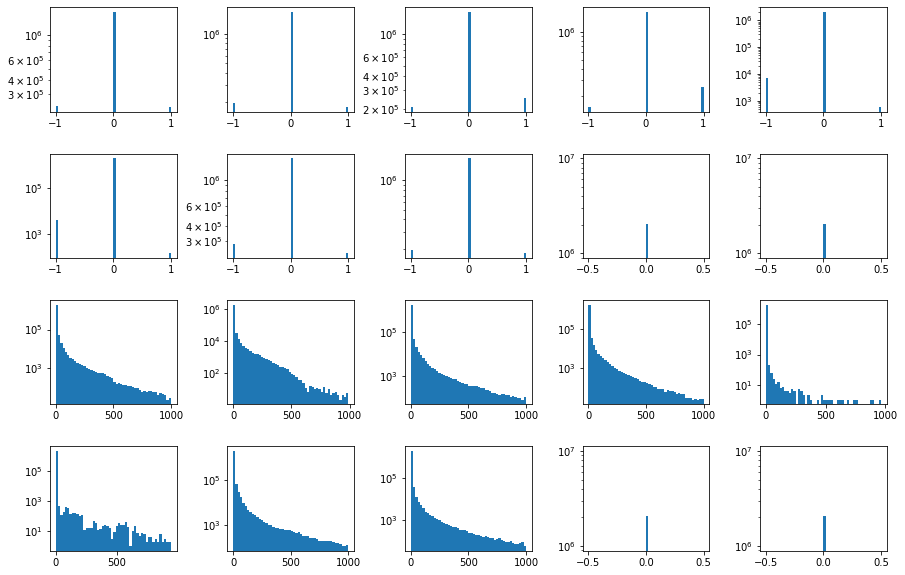

In [24]:
y_col = list(y.drop(col_drop, axis = 1).columns)
fig, axes = plt.subplots(4, 5)
fig.set_figheight(10)
fig.set_figwidth(15)
for i in range(4):
    for j in range(5):
        axes[i, j].hist(y[y_col.pop(0)], bins = 50, log=True)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [25]:
y.head(10)

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10
0,-8.791080e-05,-4.414575e-06,1.143559e-04,-9.616432e-05,2.705426e-05,-3.106866e-05,7.835712e-05,-1.333654e-06,0.0,0.0,...,8.791080e-05,4.414575e-06,1.143559e-04,9.616432e-05,2.705426e-05,3.106866e-05,7.835712e-05,1.333654e-06,0.0,0.0
1,-3.400631e-05,5.328767e-07,-1.824103e-05,6.958084e-05,-6.003952e-08,1.726643e-08,3.493936e-05,-5.232001e-05,0.0,0.0,...,3.400631e-05,5.328767e-07,1.824103e-05,6.958084e-05,6.003952e-08,1.726643e-08,3.493936e-05,5.232001e-05,0.0,0.0
2,3.865398e-04,-1.879088e-05,-1.351098e-04,-8.501219e-05,-1.026486e-05,-1.058502e-06,-4.054661e-04,2.803504e-04,0.0,0.0,...,3.865398e-04,1.879088e-05,1.351098e-04,8.501219e-05,1.026486e-05,1.058502e-06,4.054661e-04,2.803504e-04,0.0,0.0
3,1.873768e+01,7.919502e+00,-2.409660e+01,7.386922e+00,3.235493e-03,2.141220e-04,3.327256e+00,8.637778e-01,0.0,0.0,...,1.873768e+01,7.919502e+00,2.409660e+01,7.386922e+00,3.235493e-03,2.141220e-04,3.327256e+00,8.637778e-01,0.0,0.0
4,2.257837e+01,7.018544e+00,-5.384598e+01,1.355045e+01,8.189336e-04,-1.004742e-04,4.898416e+01,2.625700e+01,0.0,0.0,...,2.257837e+01,7.018544e+00,5.384598e+01,1.355045e+01,8.189336e-04,1.004742e-04,4.898416e+01,2.625700e+01,0.0,0.0
5,1.825007e+00,-6.198862e-03,-3.000717e-04,4.228757e-02,6.472828e-09,1.523523e-08,-3.691702e+00,-2.958982e-02,0.0,0.0,...,1.825007e+00,6.198862e-03,3.000717e-04,4.228757e-02,6.472828e-09,1.523523e-08,3.691702e+00,2.958982e-02,0.0,0.0
6,-2.665445e-04,1.205653e-06,1.520470e-04,3.185179e-05,5.426107e-05,-5.835189e-05,2.595859e-04,-1.781285e-04,0.0,0.0,...,2.665445e-04,1.205653e-06,1.520470e-04,3.185179e-05,5.426107e-05,5.835189e-05,2.595859e-04,1.781285e-04,0.0,0.0
7,-2.062268e-06,5.430671e-07,9.313917e-07,-1.377671e-10,4.085176e-07,-3.569882e-07,2.567350e-06,-2.120447e-06,0.0,0.0,...,2.062268e-06,5.430671e-07,9.313917e-07,1.377671e-10,4.085176e-07,3.569882e-07,2.567350e-06,2.120447e-06,0.0,0.0
8,-1.578228e-07,-5.206298e-08,2.959347e-07,-3.931808e-07,3.498772e-10,9.970706e-10,1.146130e-07,1.986782e-07,0.0,0.0,...,1.578228e-07,5.206298e-08,2.959347e-07,3.931808e-07,3.498772e-10,9.970706e-10,1.146130e-07,1.986782e-07,0.0,0.0
9,3.805757e-05,-3.412824e-06,-1.466647e-05,-2.537047e-05,-1.912873e-05,1.959361e-05,-4.147021e-05,4.593283e-05,0.0,0.0,...,3.805757e-05,3.412824e-06,1.466647e-05,2.537047e-05,1.912873e-05,1.959361e-05,4.147021e-05,4.593283e-05,0.0,0.0


In [26]:
save_cols = y.columns

In [27]:
X.shape

(2050000, 11)

In [28]:
y.shape

(2050000, 30)

In [29]:
X_train = X[0:2000000].to_numpy().copy() #пока беру 500.000
y_train = y[0:2000000].to_numpy().copy()
X_val = X[2000000:2025000].to_numpy().copy()
y_val = y[2000000:2025000].to_numpy().copy()
X_test = X[2025000:2050000].to_numpy().copy()
y_test = y[2025000:2050000].to_numpy().copy()

In [30]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2000000, 11)
(25000, 11)
(25000, 11)


In [31]:
X_train

array([[3.65190731e+03, 2.60198008e+01, 6.04372186e+01, ...,
        1.63184806e+01, 3.54463564e+02, 4.85667260e-01],
       [4.89496527e+03, 5.63121437e+01, 5.78096451e-01, ...,
        1.18178445e+01, 1.95941569e+02, 5.71799430e-01],
       [4.61768693e+03, 1.81102850e+01, 8.82573189e+01, ...,
        1.02992481e+02, 4.13485006e+01, 1.11381945e-02],
       ...,
       [2.59817250e+03, 2.11836494e-02, 6.28567121e-03, ...,
        1.01874880e-03, 1.30034160e-03, 3.60007635e-02],
       [2.59678380e+03, 4.55572218e-02, 1.63912156e-01, ...,
        7.30656324e-02, 1.64788827e-01, 3.57995190e-03],
       [1.97054033e+03, 5.61139293e+00, 6.23812268e-08, ...,
        4.74134141e-06, 3.54332589e-01, 5.76516768e-02]])

# Data normalization

In [32]:
def prepare_data(Mas, eps = 1e-12):
    return np.where(Mas < eps, Mas/eps, 1 + np.log(Mas/eps))

def prepare_data_T(Mas):
    return Mas/100

In [33]:
X_train[:, 1:11] = prepare_data(X_train[:, 1:11]).copy()
X_val[:, 1:11] = prepare_data(X_val[:, 1:11]).copy()
X_test[:, 1:11] = prepare_data(X_test[:, 1:11]).copy()

X_train[:, 0] = prepare_data_T(X_train[:, 0]).copy()
X_val[:, 0] = prepare_data_T(X_val[:, 0]).copy()
X_test[:, 0] = prepare_data_T(X_test[:, 0]).copy()

In [34]:
X_train

array([[36.51907313, 31.88987893, 32.73262623, ..., 31.42331936,
        34.50162668, 27.90878958],
       [48.94965266, 32.66193132, 28.08300656, ..., 31.10063175,
        33.90883761, 28.07205412],
       [46.17686928, 31.52750113, 33.11127774, ..., 33.2656771 ,
        32.35305728, 24.13364598],
       ...,
       [25.98172504, 24.77649547, 23.56153847, ..., 21.74184104,
        21.98589284, 25.30680598],
       [25.96783796, 25.542235  , 26.82259649, ..., 26.01462395,
        26.82793065, 22.9986152 ],
       [19.70540332, 30.3558201 , 12.04101966, ..., 16.37183065,
        27.59350183, 25.77768517]])

In [35]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [36]:
X_train

tensor([[36.5191, 31.8899, 32.7326,  ..., 31.4233, 34.5016, 27.9088],
        [48.9497, 32.6619, 28.0830,  ..., 31.1006, 33.9088, 28.0721],
        [46.1769, 31.5275, 33.1113,  ..., 33.2657, 32.3531, 24.1336],
        ...,
        [25.9817, 24.7765, 23.5615,  ..., 21.7418, 21.9859, 25.3068],
        [25.9678, 25.5422, 26.8226,  ..., 26.0146, 26.8279, 22.9986],
        [19.7054, 30.3558, 12.0410,  ..., 16.3718, 27.5935, 25.7777]])

In [37]:
y_train

tensor([[-8.7911e-05, -4.4146e-06,  1.1436e-04,  ...,  1.3337e-06,
          0.0000e+00,  0.0000e+00],
        [-3.4006e-05,  5.3288e-07, -1.8241e-05,  ...,  5.2320e-05,
          0.0000e+00,  0.0000e+00],
        [ 3.8654e-04, -1.8791e-05, -1.3511e-04,  ...,  2.8035e-04,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 8.4063e+00,  3.6563e+00, -1.1561e+01,  ...,  9.1171e-01,
          0.0000e+00,  0.0000e+00],
        [-1.9062e+01, -2.3172e+01,  4.0379e+01,  ...,  4.4985e+01,
          0.0000e+00,  0.0000e+00],
        [ 8.3748e+01, -1.6294e-04,  3.5255e-01,  ...,  1.2174e-02,
          0.0000e+00,  0.0000e+00]])

# OUR NET

In [38]:
class Net(torch.nn.Module):
    def __init__(self, slope):
        super().__init__()
        self.fc1 = torch.nn.Linear(11, 150)
        self.bn1 = nn.BatchNorm1d(num_features=150)
        self.relu1 = torch.nn.LeakyReLU(negative_slope = slope)  
        
        self.fc2 = torch.nn.Linear(150, 170)
        self.bn2 = nn.BatchNorm1d(num_features=170)
        self.relu2 = torch.nn.LeakyReLU(negative_slope = slope)
        
        self.fc3 = torch.nn.Linear(170, 190)
        self.bn3 = nn.BatchNorm1d(num_features=190)
        self.relu3 = torch.nn.LeakyReLU(negative_slope = slope)
        
        self.fc4 = torch.nn.Linear(190, 190)
        self.bn4 = nn.BatchNorm1d(num_features=190)
        self.relu4 = torch.nn.LeakyReLU(negative_slope = slope)
        
        self.fc51 = torch.nn.Linear(190, 10)
#         self.relu41 = torch.nn.LeakyReLU(negative_slope = slope) #linear
        
        self.fc52 = torch.nn.Linear(190, 10)
        self.tanh52 = torch.nn.Tanh()
        
    
    def forward(self, x):                              
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu1(out)
#         print(torch.isnan(out))
        
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu2(out)
#         print(torch.isnan(out))
        
        out = self.fc3(out)
        out = self.bn3(out)
        out = self.relu3(out)
#         print(torch.isnan(out))
    
        out = self.fc4(out)
        out = self.bn4(out)
        out = self.relu4(out)
#         print(torch.isnan(out))
        
        out1 = self.fc51(out)
#         out1 = self.relu41(out1)
        
        out2 = self.fc52(out)
        out2 = self.tanh52(out2)

        return out1, out2

In [70]:
# import random
# RANDOM_SEED = 5
# torch.manual_seed(RANDOM_SEED)
# torch.cuda.manual_seed(RANDOM_SEED)
# torch.cuda.manual_seed_all(RANDOM_SEED)
# np.random.seed(RANDOM_SEED)
# random.seed(RANDOM_SEED)

In [71]:
train_data = TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=250, shuffle = True)
save_cols

Index(['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10', 's1', 's2',
       's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 'l1', 'l2', 'l3', 'l4',
       'l5', 'l6', 'l7', 'l8', 'l9', 'l10'],
      dtype='object')

In [72]:
model = Net(0.15)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, verbose=True) #обновление лернингрейта

## Custom loss function


In [73]:
def reverse_norm_w(Mas, eps = 1e-12):
    """
    reverse normalization for w_i
    """
    return torch.where(torch.abs(Mas)<20, torch.exp(torch.abs(Mas)-1)*eps, 
                       eps*torch.exp(torch.tensor([20. - 1]))*(Mas - 20. + 1))

In [74]:
x = torch.tensor([3.7232e+05])
reverse_norm_w(x)

tensor([66.4491])

In [75]:
H = torch.tensor([2., 0., 2., 1., 1., 2., 1., 0., 0., 0.])
O = torch.tensor([0., 2., 1., 1., 2., 2., 0., 1., 0., 0.])

CE_mem = []
MSE_mem = []
LH_mem = []
LO_mem = []

crash_batch = []
y_pred_s_err = []
y_pred_l_err = []
LH_error = []

def loss_function(y_pred_l, y_pred_s, y_batch):
    """
    my custom loss function
    """

    MSE = nn.MSELoss()(y_pred_l, y_batch[:, 20:30])
    
       
    A = torch.log((1 + y_pred_s)/2 + 1e-10) #problem solved +eps -inf*0=nan
#     A[A<-100] = -100 #problem with inf
    B = torch.log((1 - y_pred_s)/2 + 1e-10)
#     B[B<-100] = -100
    CE1 = torch.mul(torch.pow(y_batch[:, 10:20], 2) * (1 + y_batch[:, 10:20]), A)
    CE2 = torch.mul(torch.pow(y_batch[:, 10:20], 2) * (1 - y_batch[:, 10:20]), B)
    
    CE = CE1+CE2
    CE = torch.sum(CE, 1)
    CE = -(CE)/2
    CE = torch.mean(CE)
        
    temp = torch.mul(torch.sign(y_pred_s), reverse_norm_w(y_pred_l)) #sign(s_i) * e^y_i не матричное умножение #
# #     print('temp is {}'.format(temp))
    MAX = torch.max(torch.abs(y_batch[:, 0:10]), 1)[0]
#     LO = torch.mean(torch.abs(torch.matmul(temp, O))/(MAX + 1)) #problem solved +1 X/MAX=nan
    LH = torch.mean(torch.abs(torch.matmul(temp, H))/(MAX + 1))
    
    
    if (LH > 500):
        y_pred_s_err.append(y_pred_s)
        y_pred_l_err.append(y_pred_l)
        LH_error.append(LH.item())
        crash_batch.append(y_batch.detach())
        print('BIG LH!!!!!!!!!!!!!!!!!!!!!!!!!!')
        
        
    MSE_mem.append(MSE.item())
    CE_mem.append(CE.item())
    LH_mem.append(LH.item())
#     LO_mem.append(LO.item())
    
    
    print('---------------------------------')
    print('MSE metric {}'.format(MSE))
    print('CE metric {}'.format(CE))  
    print('LH metric {}'.format(LH))
#     print('LO metric {}'.format(LO))
    print('---------------------------------')
    
    return MSE + CE + LH #+ LO

In [76]:
# model.eval()
# for x_batch, y_batch in train_loader: #for test loss function
#     y_pred_l, y_pred_s = model.forward(x_batch)
# #     print('y_pred_l is {}'.format(reverse_norm_w(y_pred_l)))
# #     print('y_pred_s is {}'.format(y_pred_s))
#     print('y_batch is {}'.format(y_batch[:, 0:10]))
#     loss = loss_function(y_pred_l, y_pred_s, y_batch)
#     print(loss)
#     break

In [77]:
epoch_num = 2000
loss_history = [] 
# found = False
for epoch in range(epoch_num):
    
#     if found:
#         break
        
    loss_mean = []
    for x_batch, y_batch in train_loader:  
        
        optimizer.zero_grad() 
        
        y_pred_l, y_pred_s = model.forward(x_batch)
#         for param in model.parameters():
#             print(param.data)
#         print('y_pred_l is {}'.format(y_pred_l))
#         print('y_batch is {}'.format(y_batch[:, 20:30]))

        with torch.autograd.detect_anomaly(): #ловит нан в градиентах
            loss = loss_function(y_pred_l, y_pred_s, y_batch)
            
#         if (loss.item() >= 1000000.):
#             y_pred_l_save = y_pred_l
#             y_pred_s_save = y_pred_s
#             y_batch_save = y_batch
#             print("BUG_big")
#             found = True
#             break
            
#         if (loss.item() == np.nan):
#             y_pred_l_save = y_pred_l
#             y_pred_s_save = y_pred_s
#             y_batch_save = y_batch
#             print("BUG_nan")
#             found = True
#             break
       
            loss_mean.append(loss.item())
            loss.backward()  
            
        optimizer.step() 
    
#     model.eval()
#     y_p_l, y_p_s = model.forward(X_val)
#     validate = loss_function(y_p_l, y_p_s, y_val)
    
    scheduler.step(np.mean(loss_mean))
    print(epoch, 
          np.mean(loss_mean), 
          np.std(loss_mean),
          np.median(loss_mean))
#           np.linalg.norm(y_batch.detach().numpy()), 
#           np.linalg.norm(y_pred.detach().numpy()))
    
    loss_history.append(np.mean(loss_mean))

---------------------------------
MSE metric 946.7357788085938
CE metric 0.8746592402458191
LH metric 8.314289469575631e-13
---------------------------------
---------------------------------
MSE metric 557.2241821289062
CE metric 1.5982288122177124
LH metric 1.7198877912960597e-06
---------------------------------
---------------------------------
MSE metric 322.05169677734375
CE metric 2.8165271282196045
LH metric 3.755396278393164e-07
---------------------------------
---------------------------------
MSE metric 420.4479675292969
CE metric 3.2293388843536377
LH metric 7.703570008743554e-05
---------------------------------
---------------------------------
MSE metric 628.7014770507812
CE metric 2.93559193611145
LH metric 0.0001738088030833751
---------------------------------
---------------------------------
MSE metric 1449.062744140625
CE metric 1.5465995073318481
LH metric 0.0002588258939795196
---------------------------------
---------------------------------
MSE metric 738.729

..\torch\csrc\autograd\python_anomaly_mode.cpp:57: UserWarning: Traceback of forward call that caused the error:
  File "C:\Users\user\.conda\envs\tf2gpu_torch\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\user\.conda\envs\tf2gpu_torch\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\user\.conda\envs\tf2gpu_torch\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\user\.conda\envs\tf2gpu_torch\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\user\.conda\envs\tf2gpu_torch\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "C:\Users\user\.conda\envs\tf2gpu_torch\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\user\.conda\envs\tf2gpu_torch\lib\asyncio\base_events.py", line 438, 

RuntimeError: Function 'ExpBackward' returned nan values in its 0th output.

ниже копался в ошибке и графиках

In [ ]:
LH_error

In [ ]:
ind = -1

In [ ]:
temp = torch.mul(torch.sign(y_pred_s_err[ind]), reverse_norm_w(y_pred_l_err[ind]))
MAX = torch.max(torch.abs(crash_batch[ind][:, 0:10]), 1)[0]
LH = torch.mean(torch.abs(torch.matmul(temp, H))/(MAX + 1))
LH

In [ ]:
j = 0
for i in range(temp.shape[0]):
    check = torch.abs(torch.matmul(temp[i], H)).item()
    if check > 500:
        j = i
        print(check)
j

In [ ]:
temp[j]

In [ ]:
y_pred_l[j]

In [ ]:
crash_batch[-2][j][20:30]

In [ ]:
temp[j-1]

In [ ]:
crash_batch[-2][j-1][20:30]

In [52]:
temp = torch.mul(torch.sign(y_pred_s), reverse_norm_w(y_pred_l))
MAX = torch.max(torch.abs(y_batch[:, 0:10]), 1)[0]
LH = torch.mean(torch.abs(torch.matmul(temp, H))/(MAX + 1))
LH

tensor(2.8833e-08, grad_fn=<MeanBackward0>)

In [63]:
x = torch.tensor([200.])
torch.exp(x)

tensor([inf])

In [64]:
np.exp(2e+02)

7.225973768125749e+86

In [53]:
np.exp(2e-08)

1.00000002

In [50]:
y_batch[20:30]

tensor([[ 8.2864e-09, -7.1987e-10, -1.8017e-08,  2.6995e-08, -1.3034e-09,
          1.0957e-09, -8.4208e-09, -7.1223e-09,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          8.2864e-09,  7.1987e-10,  1.8017e-08,  2.6995e-08,  1.3034e-09,
          1.0957e-09,  8.4208e-09,  7.1223e-09,  0.0000e+00,  0.0000e+00],
        [-2.8496e-08,  2.9661e-09,  9.3494e-09,  6.5216e-09,  3.9454e-11,
         -4.0335e-11,  3.1813e-08, -2.1801e-08,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          2.8496e-08,  2.9661e-09,  9.3494e-09,  6.5216e-09,  3.9454e-11,
          4.0335e-11,  3.1813e-08,  2.1801e-08,  0.0000e+00,  0.0000e+00],
        [ 1.8916e-05, -9.6917e-06, -4.1098e-05,  3.7562e-06, -9.3191e-09,
         -1.8559e-09,  4.0621e-05,  

In [49]:
y_pred_s

tensor([[ 0.2055,  0.8405, -0.7556,  ..., -0.6634,  0.0596,  0.0497],
        [ 0.7250,  0.8925, -0.6522,  ...,  0.5509,  0.1730,  0.0098],
        [ 0.1612,  0.8966, -0.7650,  ..., -0.6531,  0.0486,  0.0982],
        ...,
        [-0.2599,  0.9653, -0.8948,  ..., -0.9111,  0.0043,  0.1299],
        [ 0.1678,  0.8393, -0.7375,  ..., -0.6996,  0.0424,  0.0604],
        [ 0.9918, -0.9843, -0.6671,  ..., -0.9588, -0.2470, -0.3792]],
       grad_fn=<TanhBackward>)

In [ ]:
# for param in model.parameters():
#     print(param.data)

In [ ]:
graph = [MSE_mem, CE_mem, LH_mem, LO_mem]

In [ ]:
for elem in graph:
    for i in range(np.isnan(elem).size):
        if (np.isnan(CE_mem)[i] == True):
            print(i)
            break

In [ ]:
for elem in graph:
    print(elem[17098])

In [ ]:
fig, axes = plt.subplots(2, 2)
fig.set_figheight(7)
fig.set_figwidth(10)
axes[0, 0].plot(graph[0])
axes[0, 1].plot(graph[1])
axes[1, 0].plot(graph[2])
axes[1, 1].plot(graph[3])
plt.subplots_adjust(wspace=0.2, hspace=0.2)

In [ ]:
plt.figure(figsize = (14,5))
plt.plot(loss_history) #нейросеть номер 1
plt.show()

In [ ]:
model.eval()
y_p_l, y_p_s = model.forward(X_val)
print(loss_function(y_p_l, y_p_s, y_val))

In [ ]:
x = torch.tensor([1., 2., 3.])
x.requires_grad_(True)
start = x
for i in range(3):
    y = torch.pow(5*x, 2)
    x = y

In [ ]:
start

In [ ]:
y

In [ ]:
y.backward(torch.eye(3))

In [ ]:
start.grad.data

In [ ]:
8*(5.**14)*torch.pow(start, 7)

In [ ]:
def get_jacobian(net, x, noutputs):
    x = x.squeeze()
    n = x.size()[0]
    x = x.repeat(noutputs, 1)
    x.requires_grad_(True)
    y = net(x)
    y.backward(torch.eye(noutputs))
    return x.grad.data